In [49]:
import pandas as pd
import mlxtend
from mlxtend.classifier import StackingCVClassifier
%run Global.ipynb
%run Text_Preprocessing.ipynb
%run Helper_Functions.ipynb

In [3]:
df = pd.read_csv("book_rating_train.csv")

In [4]:
df.columns

Index(['Name', 'Authors', 'PublishYear', 'PublishMonth', 'PublishDay',
       'Publisher', 'Language', 'pagesNumber', 'Description', 'rating_label'],
      dtype='object')

In [5]:
df.shape

(23063, 10)

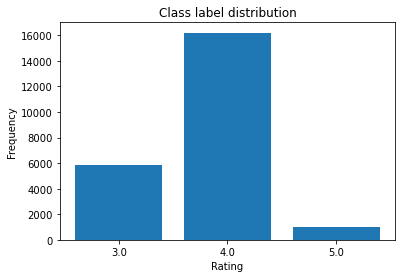

In [8]:
import matplotlib.pyplot as plt
class_labels, counts = np.unique(df['rating_label'], return_counts=True)
plt.bar([str(x) for x in class_labels], counts)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Class label distribution")
plt.show()

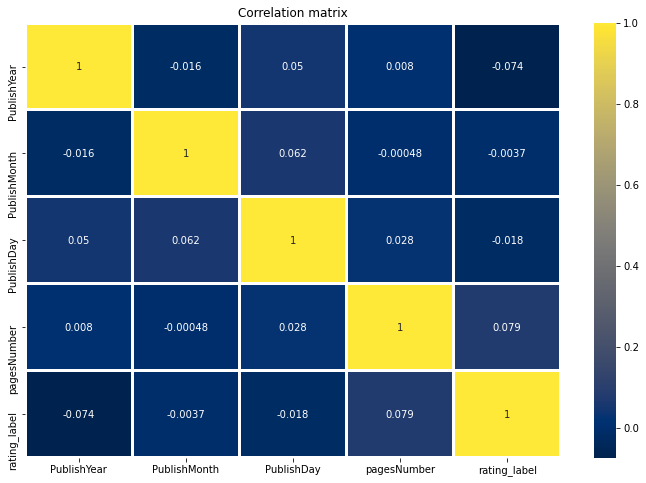

In [11]:
# Look at the correlation matrix of the numerical attributes
cor_matrix = df[['PublishYear', 'PublishMonth', 'PublishDay','pagesNumber', 'rating_label']].corr()
round(cor_matrix, 2)
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, cmap='cividis', annot=True, linewidths=2)
plt.title("Correlation matrix")
plt.show()

In [1]:
%run Global.ipynb
%run Helper_Functions.ipynb

In [3]:
train_df_ohe_selected = pd.read_csv("./Final/Datasets/train_df.csv", keep_default_na=False)

X_orig = train_df_ohe_selected.iloc[:,:-1] # (transformed) attributes
y = train_df_ohe_selected.iloc[:,-1]  # ground truth labels
X = X_orig.drop(['PublishMonth', 'PublishDay'], axis=1)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm


# Stacking Clf

## Individual tuning

In [ ]:
# tune knn
knn = KNeighborsClassifier(n_neighbors=3)
param_grid = {'n_neighbors': [1, 5, 10, 15]}
grid_knn = tune_hyperparameter(knn, param_grid, X, y, cv=4)

In [13]:
print(max(grid_knn['mean_test_accuracy']))
grid_knn.loc[grid_knn['mean_test_accuracy'] == max(grid_knn['mean_test_accuracy'])]['params'].values

0.7022071243967163


array([{'n_neighbors': 15}], dtype=object)

KNeighborsClassifier prediction took 13.319572925567627 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.514851    0.088586      0.151163       0.713118    0.969155   
1       0.514286    0.091993      0.156069       0.714026    0.967304   
2       0.469880    0.066553      0.116592       0.709402    0.972856   
3       0.476744    0.069966      0.122024       0.710550    0.972239   
4       0.500000    0.083618      0.143275       0.714026    0.970389   
5       0.576923    0.102389      0.173913       0.717797    0.972856   
6       0.535714    0.076792      0.134328       0.713255    0.975941   
7       0.489130    0.076792      0.132743       0.712670    0.971622   
8       0.514851    0.088586      0.151163       0.714221    0.970370   
9       0.611111    0.074957      0.133536       0.715119    0.983951   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.821653       0.666667    0.020202      0.039216  0.7

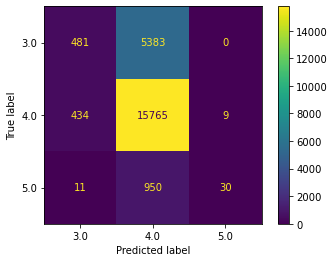

,mean,std
3.0_precision,0.520349,0.044233
3.0_recall,0.082023,0.011016
3.0_f1-score,0.141481,0.017140
4.0_precision,0.713418,0.002321
4.0_recall,0.972668,0.004606
4.0_f1-score,0.823107,0.002429
5.0_precision,0.718333,0.278161
5.0_recall,0.030303,0.014285
5.0_f1-score,0.057977,0.026994
accuracy,0.705719,0.003701


In [40]:
knn = KNeighborsClassifier(n_neighbors=15)
y_pred_knn, knn_report = cross_val_report(knn, X, y)
knn_report

KNeighborsClassifier prediction took 14.69714093208313 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.470046    0.173765      0.253731       0.723873    0.931524   
1       0.456853    0.153322      0.229592       0.720819    0.933374   
2       0.511236    0.155290      0.238220       0.723635    0.948180   
3       0.460674    0.139932      0.214660       0.719414    0.939543   
4       0.494624    0.156997      0.238342       0.723616    0.943245   
5       0.487437    0.165529      0.247134       0.723465    0.937693   
6       0.491803    0.153584      0.234070       0.724268    0.946329   
7       0.455026    0.146758      0.221935       0.720303    0.938927   
8       0.461111    0.141397      0.216428       0.718396    0.940123   
9       0.479290    0.137990      0.214286       0.720188    0.946914   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.814675       0.750000    0.030303      0.058252  0.70

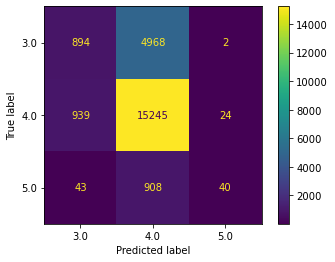

,mean,std
3.0_precision,0.476810,0.019066
3.0_recall,0.152456,0.011434
3.0_f1-score,0.230840,0.013885
4.0_precision,0.721798,0.002183
4.0_recall,0.940585,0.005621
4.0_f1-score,0.816787,0.002672
5.0_precision,0.620996,0.194763
5.0_recall,0.040394,0.016516
5.0_f1-score,0.075285,0.029407
accuracy,0.701513,0.003449


In [112]:
knn = KNeighborsClassifier(n_neighbors=10)
y_pred_knn, knn_report = cross_val_report(knn, X, y)
knn_report

In [ ]:
# tune dt
dt = DecisionTreeClassifier(random_state = 30027)
dt.get_params()
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [200, 400, 600]}
grid_dt = tune_hyperparameter(dt, param_grid, X, y, cv = 3)

In [25]:
print(max(grid_dt['mean_test_accuracy']))
grid_dt.loc[grid_dt['mean_test_accuracy'] == max(grid_dt['mean_test_accuracy'])]['params'].values

0.6848631244077317


array([{'criterion': 'entropy', 'max_depth': 400},
       {'criterion': 'entropy', 'max_depth': 600},
       {'criterion': 'log_loss', 'max_depth': 400},
       {'criterion': 'log_loss', 'max_depth': 600}], dtype=object)

DecisionTreeClassifier prediction took 21.569507122039795 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.412979    0.238501      0.302376       0.729632    0.867366   
1       0.450000    0.245315      0.317530       0.733367    0.884022   
2       0.403175    0.216724      0.281909       0.727459    0.876002   
3       0.417178    0.232082      0.298246       0.731266    0.872918   
4       0.459016    0.238908      0.314254       0.735234    0.890808   
5       0.459930    0.225256      0.302405       0.733536    0.893276   
6       0.413793    0.225256      0.291713       0.726807    0.874769   
7       0.425926    0.235495      0.303297       0.731282    0.879704   
8       0.446541    0.241908      0.313812       0.734391    0.885802   
9       0.428135    0.238501      0.306346       0.729758    0.873457   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.792559       0.341463    0.141414      0.200000  0

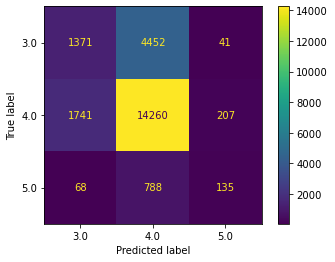

,mean,std
3.0_precision,0.431667,0.020656
3.0_recall,0.233795,0.008895
3.0_f1-score,0.303189,0.010859
4.0_precision,0.731273,0.002875
4.0_recall,0.879812,0.008423
4.0_f1-score,0.798687,0.004918
5.0_precision,0.353311,0.052811
5.0_recall,0.136263,0.025467
5.0_f1-score,0.196137,0.032912
accuracy,0.683606,0.006790


In [26]:
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 400, random_state = 30027)
y_pred_dt, dt_report = cross_val_report(dt, X, y)
dt_report

DecisionTreeClassifier prediction took 18.303519010543823 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.412651    0.233390      0.298150       0.730093    0.871067   
1       0.456026    0.238501      0.313199       0.732179    0.887107   
2       0.423948    0.223549      0.292737       0.730710    0.882171   
3       0.415584    0.218430      0.286353       0.730710    0.882171   
4       0.461806    0.226962      0.304348       0.733367    0.897594   
5       0.455197    0.216724      0.293642       0.732458    0.895126   
6       0.403785    0.218430      0.283499       0.725691    0.874769   
7       0.427692    0.237201      0.305159       0.731282    0.879704   
8       0.455128    0.241908      0.315907       0.734558    0.888272   
9       0.428571    0.240204      0.307860       0.730093    0.871605   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.794374       0.341463    0.141414      0.200000  0

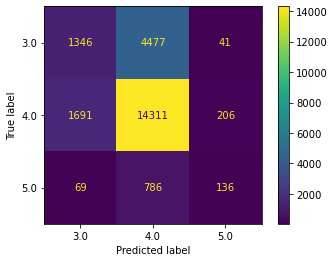

,mean,std
3.0_precision,0.434039,0.021166
3.0_recall,0.229530,0.009855
3.0_f1-score,0.300086,0.011003
4.0_precision,0.731114,0.002397
4.0_recall,0.882959,0.009171
4.0_f1-score,0.799882,0.004884
5.0_precision,0.353119,0.043845
5.0_recall,0.137253,0.029506
5.0_f1-score,0.197112,0.036396
accuracy,0.684777,0.006465


In [111]:
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 200, random_state = 30027)
y_pred_dt, dt_report = cross_val_report(dt, X, y)
dt_report

In [44]:
# tune mnb
mnb = MultinomialNB()
param_grid = {'alpha': [0.1, 0.5, 1,2]}
grid_mnb = tune_hyperparameter(mnb, param_grid, X, y, cv=4)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.5; total time=   0.1s
[CV] END ..........................................alpha=0.5; total time=   0.1s
[CV] END ..........................................alpha=0.5; total time=   0.1s
[CV] END ..........................................alpha=0.5; total time=   0.1s
[CV] END ............................................alpha=1; total time=   0.1s
[CV] END ............................................alpha=1; total time=   0.1s
[CV] END ............................................alpha=1; total time=   0.1s
[CV] END ........................................

In [45]:
print(max(grid_mnb['mean_test_accuracy']))
grid_mnb.loc[grid_mnb['mean_test_accuracy'] == max(grid_mnb['mean_test_accuracy'])]['params'].values

0.7347699933124736


array([{'alpha': 1}], dtype=object)

MultinomialNB prediction took 0.8158159255981445 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.705479    0.175468      0.281037       0.734207    0.967921   
1       0.738462    0.163543      0.267782       0.734136    0.977791   
2       0.750000    0.179181      0.289256       0.737284    0.974707   
3       0.712000    0.151877      0.250352       0.733179    0.974707   
4       0.755396    0.179181      0.289655       0.735253    0.976558   
5       0.666667    0.163823      0.263014       0.735115    0.967304   
6       0.717949    0.143345      0.238976       0.731178    0.976558   
7       0.767442    0.168942      0.276923       0.737135    0.980876   
8       0.739726    0.183986      0.294679       0.737482    0.972840   
9       0.721311    0.149915      0.248237       0.732499    0.975309   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.835019       0.500000    0.121212      0.195122  0.729952  

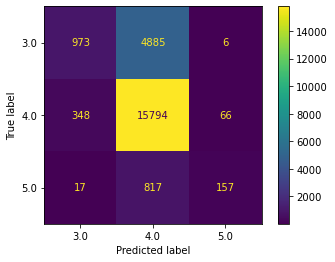

,mean,std
3.0_precision,0.727443,0.029259
3.0_recall,0.165926,0.013950
3.0_f1-score,0.269991,0.019470
4.0_precision,0.734747,0.002133
4.0_recall,0.974457,0.004197
4.0_f1-score,0.837788,0.002104
5.0_precision,0.693977,0.110209
5.0_recall,0.158444,0.031332
5.0_f1-score,0.256528,0.045173
accuracy,0.733816,0.003497


In [43]:
mnb = MultinomialNB(alpha=1)
y_pred_mnb, mnb_report = cross_val_report(mnb, X, y)
mnb_report

In [ ]:
# tune svm
linearSVM = svm.LinearSVC(dual=False, random_state=30027)
param_grid = {'C': [1,3,5]}
grid_svm = tune_hyperparameter(linearSVM, param_grid, X, y, cv=4)

In [55]:
print(max(grid_svm['mean_test_accuracy']))
grid_svm.loc[grid_svm['mean_test_accuracy'] == max(grid_svm['mean_test_accuracy'])]['params'].values

0.7344230722370182


array([{'C': 5}], dtype=object)

LinearSVC prediction took 6.8833842277526855 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.743590    0.197615      0.312248       0.739687    0.962369   
1       0.729730    0.183986      0.293878       0.739972    0.967304   
2       0.740000    0.189420      0.301630       0.738375    0.969772   
3       0.727273    0.177474      0.285322       0.738476    0.968538   
4       0.801370    0.199659      0.319672       0.742011    0.974090   
5       0.694444    0.170648      0.273973       0.737264    0.964220   
6       0.758065    0.160410      0.264789       0.734513    0.972856   
7       0.753425    0.187713      0.300546       0.741071    0.972856   
8       0.760274    0.189097      0.302865       0.737435    0.969136   
9       0.746269    0.170358      0.277393       0.737388    0.965432   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.836461       0.428571    0.181818      0.255319  0.734287  
1  

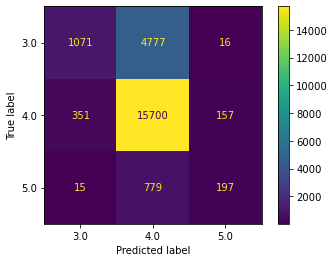

,mean,std
3.0_precision,0.745444,0.027452
3.0_recall,0.182638,0.012669
3.0_f1-score,0.293232,0.017548
4.0_precision,0.738619,0.002165
4.0_recall,0.968657,0.003912
4.0_f1-score,0.838137,0.002178
5.0_precision,0.533414,0.068645
5.0_recall,0.198859,0.041218
5.0_f1-score,0.288069,0.049969
accuracy,0.735724,0.003412


In [56]:
linearSVM = svm.LinearSVC(dual=False, C=5, random_state=30027)
y_pred_svm, svm_report = cross_val_report(linearSVM, X, y)
svm_report

## Stack

StackingCVClassifier prediction took 325.2179579734802 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.707182    0.218058      0.333333       0.743663    0.959284   
1       0.708333    0.202726      0.315232       0.743798    0.961752   
2       0.650000    0.221843      0.330789       0.743726    0.950648   
3       0.642857    0.215017      0.322251       0.742308    0.952498   
4       0.690000    0.235495      0.351145       0.745070    0.955583   
5       0.642487    0.211604      0.318357       0.743826    0.947563   
6       0.664804    0.203072      0.311111       0.741997    0.958051   
7       0.661538    0.220137      0.330346       0.744130    0.958051   
8       0.707602    0.206133      0.319261       0.741216    0.963580   
9       0.707792    0.185690      0.294197       0.739934    0.964198   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837823       0.514286    0.181818      0.268657  0.73

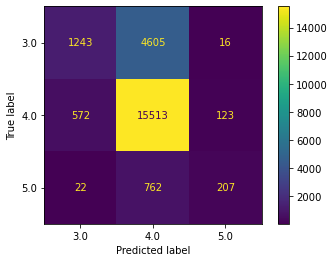

,mean,std
3.0_precision,0.678260,0.028683
3.0_recall,0.211977,0.013554
3.0_f1-score,0.322602,0.015200
4.0_precision,0.742967,0.001560
4.0_recall,0.957121,0.005544
4.0_f1-score,0.836546,0.001815
5.0_precision,0.602453,0.068337
5.0_recall,0.208899,0.044513
5.0_f1-score,0.307649,0.050544
accuracy,0.735507,0.002760


In [52]:
# base classifiers with individually tuned hyperparameters
mnb = MultinomialNB(alpha=1)
linearSVM = svm.LinearSVC(C=5, dual=False, random_state=30027)
logr = LogisticRegression(solver='sag', max_iter=100, random_state = 30027)
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 400, random_state = 30027)
knn = KNeighborsClassifier(n_neighbors=15)

sclf5 = StackingCVClassifier(classifiers=[mnb, linearSVM, logr, dt, knn], 
                            meta_classifier=CategoricalNB(),
                            cv = 2,
                            random_state=30027)
y_pred5, sclf5_report = cross_val_report(sclf5, X, y)
sclf5_report

MultinomialNB prediction took 0.9350903034210205 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.705479    0.175468      0.281037       0.734207    0.967921   
1       0.738462    0.163543      0.267782       0.734136    0.977791   
2       0.750000    0.179181      0.289256       0.737284    0.974707   
3       0.712000    0.151877      0.250352       0.733179    0.974707   
4       0.755396    0.179181      0.289655       0.735253    0.976558   
5       0.666667    0.163823      0.263014       0.735115    0.967304   
6       0.717949    0.143345      0.238976       0.731178    0.976558   
7       0.767442    0.168942      0.276923       0.737135    0.980876   
8       0.739726    0.183986      0.294679       0.737482    0.972840   
9       0.721311    0.149915      0.248237       0.732499    0.975309   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.835019       0.500000    0.121212      0.195122  0.729952  

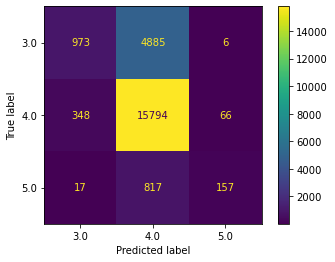

LinearSVC prediction took 7.496929168701172 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.743590    0.197615      0.312248       0.739687    0.962369   
1       0.729730    0.183986      0.293878       0.739972    0.967304   
2       0.740000    0.189420      0.301630       0.738375    0.969772   
3       0.727273    0.177474      0.285322       0.738476    0.968538   
4       0.801370    0.199659      0.319672       0.742011    0.974090   
5       0.694444    0.170648      0.273973       0.737264    0.964220   
6       0.758065    0.160410      0.264789       0.734513    0.972856   
7       0.753425    0.187713      0.300546       0.741071    0.972856   
8       0.760274    0.189097      0.302865       0.737435    0.969136   
9       0.746269    0.170358      0.277393       0.737388    0.965432   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.836461       0.428571    0.181818      0.255319  0.734287  
1   

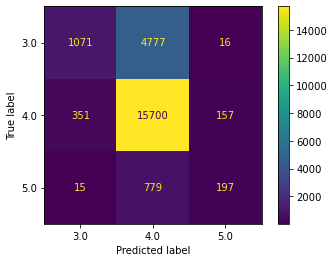

LogisticRegression prediction took 86.22571802139282 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.721854    0.185690      0.295393       0.734295    0.973473   
1       0.717391    0.168654      0.273103       0.732747    0.975941   
2       0.673333    0.172355      0.274457       0.731844    0.969772   
3       0.686131    0.160410      0.260028       0.731787    0.972856   
4       0.780142    0.187713      0.302613       0.736427    0.979025   
5       0.656489    0.146758      0.239888       0.729592    0.970389   
6       0.741667    0.151877      0.252125       0.731371    0.980876   
7       0.728571    0.174061      0.280992       0.734571    0.976558   
8       0.731544    0.185690      0.296196       0.734760    0.974691   
9       0.692857    0.165247      0.266850       0.731787    0.973457   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837135       0.714286    0.050505      0.094340  0.7334

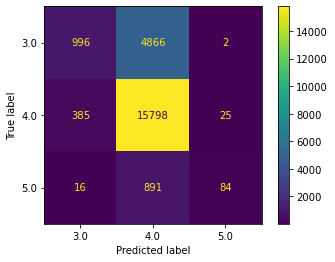

DecisionTreeClassifier prediction took 25.681063890457153 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.412979    0.238501      0.302376       0.729632    0.867366   
1       0.450000    0.245315      0.317530       0.733367    0.884022   
2       0.403175    0.216724      0.281909       0.727459    0.876002   
3       0.417178    0.232082      0.298246       0.731266    0.872918   
4       0.459016    0.238908      0.314254       0.735234    0.890808   
5       0.459930    0.225256      0.302405       0.733536    0.893276   
6       0.413793    0.225256      0.291713       0.726807    0.874769   
7       0.425926    0.235495      0.303297       0.731282    0.879704   
8       0.446541    0.241908      0.313812       0.734391    0.885802   
9       0.428135    0.238501      0.306346       0.729758    0.873457   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.792559       0.341463    0.141414      0.200000  0

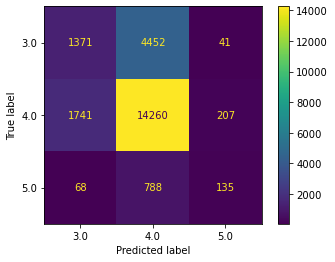

KNeighborsClassifier prediction took 18.489661931991577 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.514851    0.088586      0.151163       0.713118    0.969155   
1       0.514286    0.091993      0.156069       0.714026    0.967304   
2       0.469880    0.066553      0.116592       0.709402    0.972856   
3       0.476744    0.069966      0.122024       0.710550    0.972239   
4       0.500000    0.083618      0.143275       0.714026    0.970389   
5       0.576923    0.102389      0.173913       0.717797    0.972856   
6       0.535714    0.076792      0.134328       0.713255    0.975941   
7       0.489130    0.076792      0.132743       0.712670    0.971622   
8       0.514851    0.088586      0.151163       0.714221    0.970370   
9       0.611111    0.074957      0.133536       0.715119    0.983951   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.821653       0.666667    0.020202      0.039216  0.7

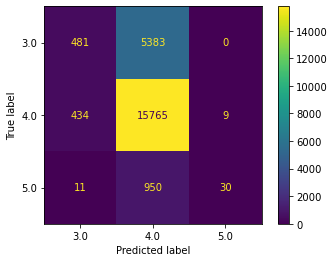

In [47]:
clfs = ["mnb", "svm", "logr", "dt", "knn", "label"]
preds0 = [cross_val_report(clf, X, y)[0] for clf in [mnb, linearSVM, logr, dt, knn]]
predictions0 = pd.DataFrame({clfs[i]:preds0[i] for i in range(6)})

In [65]:
nSame = len(list(predictions0.loc[(predictions0["mnb"] == predictions0["svm"]) & 
                (predictions0["mnb"] == predictions0["logr"]) & 
                (predictions0["mnb"] == predictions0["dt"]) & 
                (predictions0["mnb"] == predictions0["knn"])].index))
print(f'{nSame} instances have the same predictions')

18728 instances have the same predictions


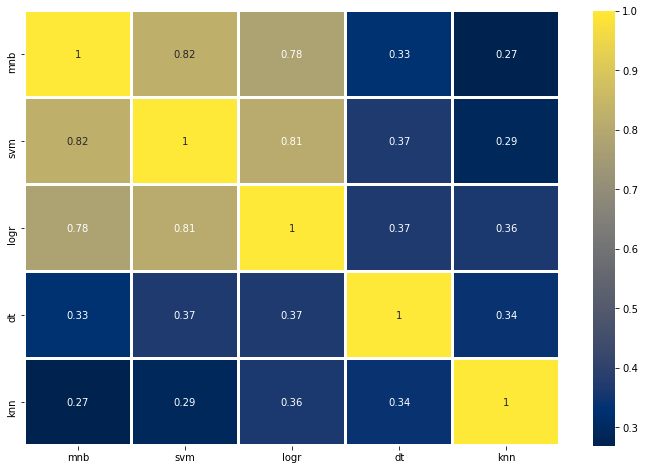

In [67]:
cor_matrix = predictions0.drop('label', axis=1).corr()
round(cor_matrix, 2)
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, cmap='cividis', annot=True, linewidths=2)
plt.show()

In [106]:
differences0 = {clf:[] for clf in clfs}
for clf1 in clfs: 
    for clf2 in clfs: 
        if clf2 != 'label':
            differences0[clf1].append(sum(predictions0[clf1] != predictions0[clf2]))
differences0.pop('label')

[6139, 6095, 6185, 7297, 6787]

In [107]:
differences0
differences0 = pd.DataFrame(differences0, index = clfs[:5])
differences0

,mnb,svm,logr,dt,knn
mnb,0,528,652,3349,1808
svm,528,0,597,3285,1930
logr,652,597,0,3148,1531
dt,3349,3285,3148,0,3109
knn,1808,1930,1531,3109,0


In [109]:
import seaborn as sns
differences0.style.background_gradient(cmap='Blues')

,mnb,svm,logr,dt,knn
mnb,0,528,652,3349,1808
svm,528,0,597,3285,1930
logr,652,597,0,3148,1531
dt,3349,3285,3148,0,3109
knn,1808,1930,1531,3109,0


In [73]:
predictions0.shape

(23063, 6)

In [33]:
# base classifiers with tuned hyperparameters
mnb = MultinomialNB(alpha = 1)
linearSVM = svm.LinearSVC(C=5, dual = False, random_state = 30027)
logr = LogisticRegression(solver='sag', max_iter=100, random_state = 30027)
dt = DecisionTreeClassifier(max_depth = 200, random_state = 30027)
knn = KNeighborsClassifier(n_neighbors=10)

MultinomialNB prediction took 0.9033031463623047 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.705479    0.175468      0.281037       0.734207    0.967921   
1       0.738462    0.163543      0.267782       0.734136    0.977791   
2       0.750000    0.179181      0.289256       0.737284    0.974707   
3       0.712000    0.151877      0.250352       0.733179    0.974707   
4       0.755396    0.179181      0.289655       0.735253    0.976558   
5       0.666667    0.163823      0.263014       0.735115    0.967304   
6       0.717949    0.143345      0.238976       0.731178    0.976558   
7       0.767442    0.168942      0.276923       0.737135    0.980876   
8       0.739726    0.183986      0.294679       0.737482    0.972840   
9       0.721311    0.149915      0.248237       0.732499    0.975309   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.835019       0.500000    0.121212      0.195122  0.729952  

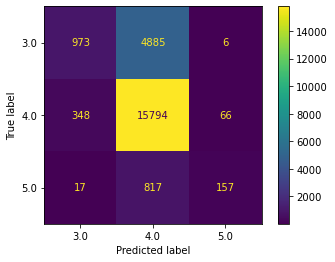

LinearSVC prediction took 29.785956859588623 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.743590    0.197615      0.312248       0.739687    0.962369   
1       0.729730    0.183986      0.293878       0.739972    0.967304   
2       0.740000    0.189420      0.301630       0.738375    0.969772   
3       0.727273    0.177474      0.285322       0.738476    0.968538   
4       0.801370    0.199659      0.319672       0.742011    0.974090   
5       0.694444    0.170648      0.273973       0.737264    0.964220   
6       0.758065    0.160410      0.264789       0.734513    0.972856   
7       0.753425    0.187713      0.300546       0.741071    0.972856   
8       0.760274    0.189097      0.302865       0.737435    0.969136   
9       0.746269    0.170358      0.277393       0.737388    0.965432   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.836461       0.428571    0.181818      0.255319  0.734287  
1  

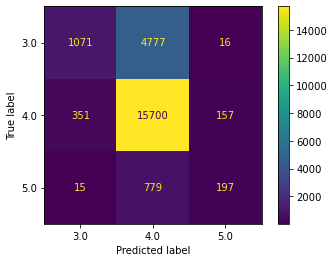

LogisticRegression prediction took 76.69483685493469 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.721854    0.185690      0.295393       0.734295    0.973473   
1       0.717391    0.168654      0.273103       0.732747    0.975941   
2       0.673333    0.172355      0.274457       0.731844    0.969772   
3       0.686131    0.160410      0.260028       0.731787    0.972856   
4       0.780142    0.187713      0.302613       0.736427    0.979025   
5       0.656489    0.146758      0.239888       0.729592    0.970389   
6       0.741667    0.151877      0.252125       0.731371    0.980876   
7       0.728571    0.174061      0.280992       0.734571    0.976558   
8       0.731544    0.185690      0.296196       0.734760    0.974691   
9       0.692857    0.165247      0.266850       0.731787    0.973457   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.837135       0.714286    0.050505      0.094340  0.7334

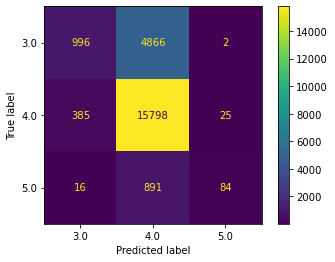

DecisionTreeClassifier prediction took 27.950901985168457 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.398256    0.233390      0.294307       0.728743    0.861814   
1       0.457317    0.255537      0.327869       0.736004    0.884022   
2       0.452599    0.252560      0.324206       0.735917    0.878470   
3       0.433628    0.250853      0.317838       0.736241    0.874769   
4       0.459283    0.240614      0.315789       0.734048    0.887107   
5       0.448718    0.238908      0.311804       0.735490    0.883405   
6       0.424242    0.215017      0.285391       0.727042    0.884022   
7       0.437107    0.237201      0.307522       0.734015    0.885256   
8       0.455414    0.243612      0.317425       0.733504    0.885185   
9       0.429851    0.245315      0.312364       0.730709    0.870988   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.789712       0.347826    0.161616      0.220690  0

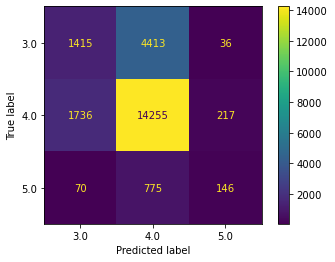

KNeighborsClassifier prediction took 19.075857877731323 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.470046    0.173765      0.253731       0.723873    0.931524   
1       0.456853    0.153322      0.229592       0.720819    0.933374   
2       0.511236    0.155290      0.238220       0.723635    0.948180   
3       0.460674    0.139932      0.214660       0.719414    0.939543   
4       0.494624    0.156997      0.238342       0.723616    0.943245   
5       0.487437    0.165529      0.247134       0.723465    0.937693   
6       0.491803    0.153584      0.234070       0.724268    0.946329   
7       0.455026    0.146758      0.221935       0.720303    0.938927   
8       0.461111    0.141397      0.216428       0.718396    0.940123   
9       0.479290    0.137990      0.214286       0.720188    0.946914   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.814675       0.750000    0.030303      0.058252  0.7

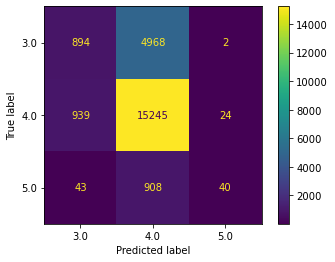

In [34]:
clfs = ["mnb", "svm", "logr", "dt", "knn", "label"]
preds = [cross_val_report(clf, X, y)[0] for clf in [mnb, linearSVM, logr, dt, knn]]
preds.append(y)
predictions = pd.DataFrame({clfs[i]:preds[i] for i in range(6)})

In [35]:
predictions

,mnb,svm,logr,dt,knn,label
0,4.0,4.0,4.0,4.0,4.0,4.0
1,4.0,4.0,4.0,4.0,4.0,4.0
2,4.0,4.0,4.0,4.0,4.0,4.0
3,4.0,4.0,4.0,4.0,4.0,4.0
4,4.0,4.0,4.0,4.0,4.0,3.0
...,...,...,...,...,...,...
23058,4.0,4.0,4.0,4.0,4.0,4.0
23059,4.0,4.0,4.0,4.0,4.0,4.0
23060,4.0,4.0,4.0,4.0,4.0,4.0
23061,4.0,4.0,4.0,4.0,4.0,4.0


In [66]:
nSame = len(list(predictions.loc[(predictions["mnb"] == predictions["svm"]) & 
                (predictions["mnb"] == predictions["logr"]) & 
                (predictions["mnb"] == predictions["dt"]) & 
                (predictions["mnb"] == predictions["knn"])].index))
print(f'{nSame} instances have the same predictions')

18608 instances have the same predictions


In [101]:
differences = {clf:[] for clf in clfs}
for clf1 in clfs: 
    for clf2 in clfs: 
        if clf2 != 'label':
            differences[clf1].append(sum(predictions[clf1] != predictions[clf2]))
differences.pop('label')

[6139, 6095, 6185, 7247, 6884]

In [110]:
differences = pd.DataFrame(differences, index = clfs[:5])
differences.style.background_gradient(cmap='Blues')

,mnb,svm,logr,dt,knn
mnb,0,528,652,3211,2256
svm,528,0,597,3142,2261
logr,652,597,0,3040,1889
dt,3211,3142,3040,0,3103
knn,2256,2261,1889,3103,0


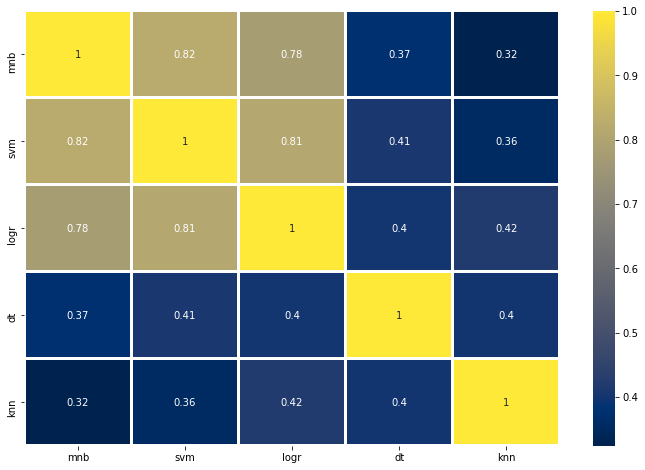

In [68]:
cor_matrix = predictions.drop('label', axis=1).corr()
round(cor_matrix, 2)
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, cmap='cividis', annot=True, linewidths=2)
plt.show()


true = mnb, predicted = mnb


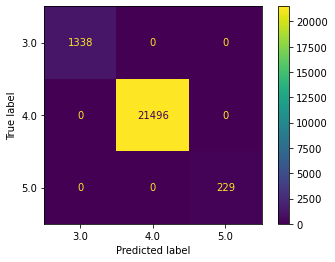



true = mnb, predicted = svm


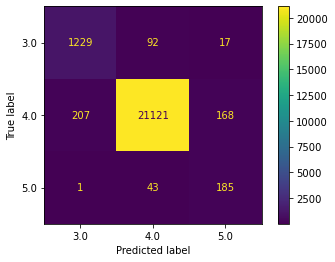



true = mnb, predicted = logr


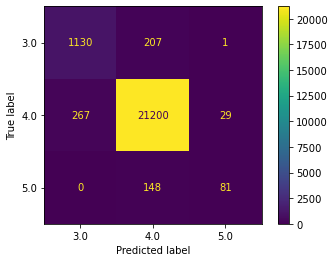



true = mnb, predicted = dt


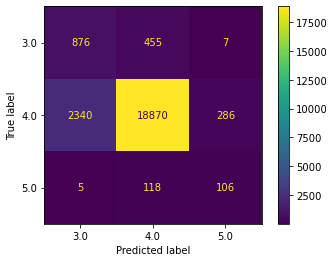



true = mnb, predicted = knn


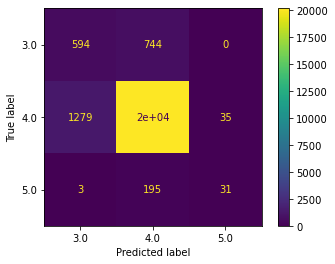



true = svm, predicted = mnb


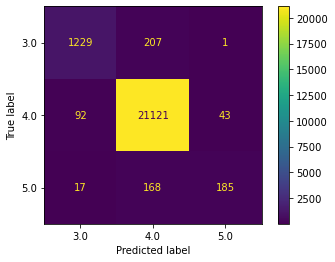



true = svm, predicted = svm


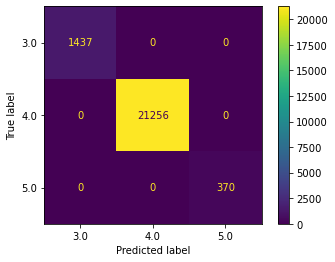



true = svm, predicted = logr


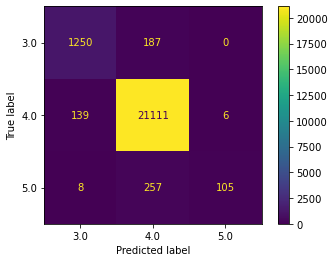



true = svm, predicted = dt


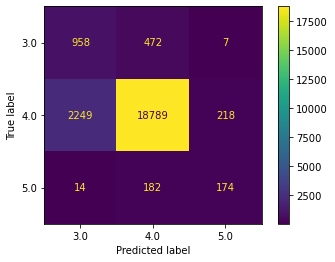



true = svm, predicted = knn


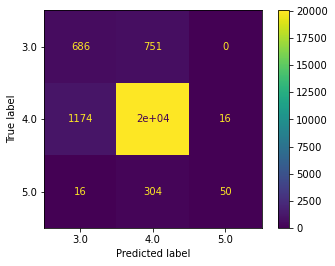



true = logr, predicted = mnb


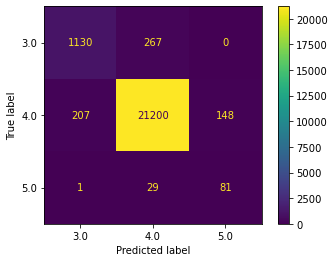



true = logr, predicted = svm


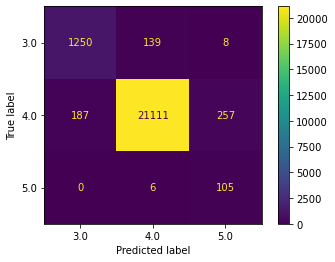



true = logr, predicted = logr


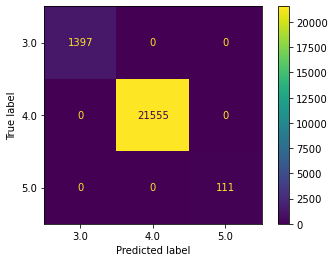



true = logr, predicted = dt


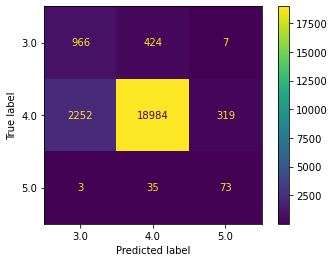



true = logr, predicted = knn


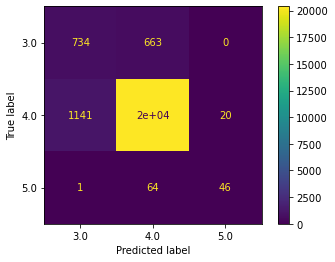



true = dt, predicted = mnb


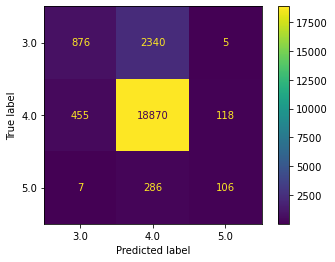



true = dt, predicted = svm


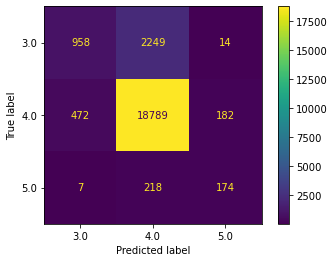



true = dt, predicted = logr


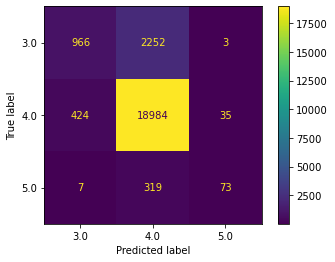



true = dt, predicted = dt


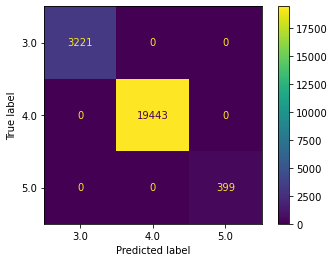



true = dt, predicted = knn


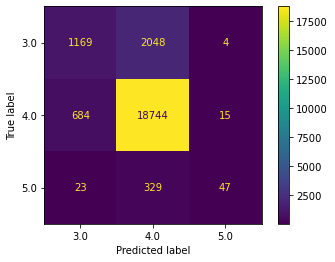



true = knn, predicted = mnb


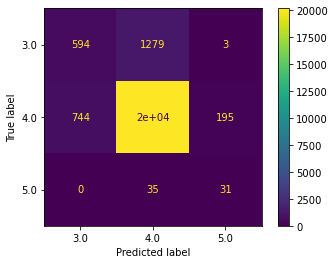



true = knn, predicted = svm


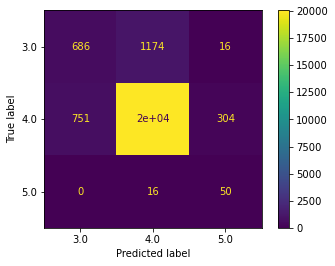



true = knn, predicted = logr


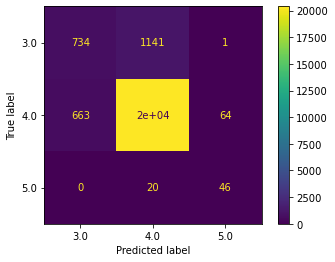



true = knn, predicted = dt


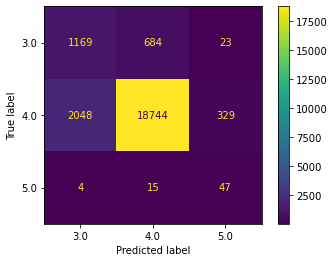



true = knn, predicted = knn


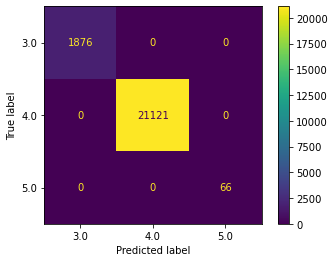

In [39]:
for i,j in [(i,j) for i in range(5) for j in range(5)]: 
    print("========================================================================================\n")
    print(f'true = {clfs[i]}, predicted = {clfs[j]}')
    cm = confusion_matrix(predictions[clfs[i]], predictions[[clfs[j]]])
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES)
    display.plot()
    plt.show()
    print()

       Metrics    SVM  Stacking_Clf_1  Stacking_Clf_2
0  3-precision  0.745           0.678           0.705
1     3-recall  0.183           0.212           0.198
2  4-precision  0.739           0.743           0.742
3     4-recall  0.969           0.957           0.963
4  5-precision  0.533           0.602           0.589
5     5-recall  0.199           0.209           0.214
6     accuracy  0.736           0.736           0.737


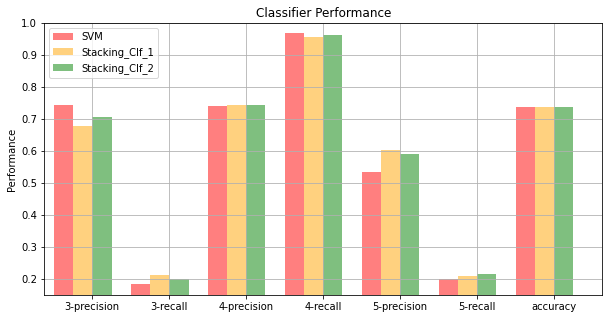

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
performances = {'Metrics': ['3-precision', '3-recall', '4-precision', '4-recall', '5-precision', '5-recall','accuracy'],
                'SVM': [0.745, 0.183, 0.739, 0.969, 0.533, 0.199, 0.736],
                'Stacking_Clf_1': [0.678, 0.212, 0.743, 0.957, 0.602, 0.209, 0.736],
                'Stacking_Clf_2': [0.705, 0.198, 0.742, 0.963, 0.589, 0.214, 0.737]}
performance_df = pd.DataFrame(performances, columns = ['Metrics', 'SVM', 'Stacking_Clf_1', 'Stacking_Clf_2'])
print(performance_df)

pos = list(range(len(performance_df['SVM'])))
width = 0.25

fig, ax = plt.subplots(figsize = (10,5))
plt.bar(pos, performance_df['SVM'], width, alpha=0.5, color='Red')
plt.bar([p+width for p in pos], performance_df['Stacking_Clf_1'], width, alpha=0.5, color='Orange')
plt.bar([p+width*2 for p in pos], performance_df['Stacking_Clf_2'], width, alpha=0.5, color='Green')
ax.set_ylabel('Performance')
ax.set_title('Classifier Performance')
ax.set_xticks([p+1.5*width for p in pos])
ax.set_xticklabels(performance_df['Metrics'])
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0.15, 1])

plt.legend(['SVM', 'Stacking_Clf_1', 'Stacking_Clf_2'], loc='upper left')
plt.grid()
plt.show()